# BUAN 670 AB - Data Mining

## Assignment 9  - Due Friday June 11, 2021 at 11:59 pm   ( 5 points in total) 

#### Note : Submit .ipynb (this) file to the blackboard. Name your .ipynb file as “Yourname_Assignment9.ipynb" before submitting.

While working on the assignment;
- Use your judgement
- State your assumptions (what do you understand)
- Solve the problem

Good luck!

In [1]:
# Import required packages for this chapter
from pathlib import Path
import math
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score

import matplotlib.pylab as plt

from dmba import classificationSummary
from dmba import AIC_score
from dmba import backward_elimination, forward_selection, stepwise_selection

%matplotlib inline

## Problem 10.1 Financial Condition of Banks.

The file _Banks.csv_ includes data on a sample of 20 banks. The "Financial Condition" column records the judgement of an expert on the financial condition of each bank. This outcome variable takes one of two possible values -- _weak_ or _strong_-- according to the financial condition of the bank. The predictors are two ratios used in the financial analysis of banks: TotLns&Lses/Assets is the ratio of total loans and leases to total assets and TotExp/Assets is the ratio of total expenses to total assets. The target is to use the two ratios for classifying the financial condition of a new bank.

Run a logistic regression model (on the entire dataset) that model the status of a bank as a function of the two financial measures provided. Specify the _success_ class as _weak_ (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the default cutoff value of 0.5.

In [2]:
# load the data
bank_df = pd.read_csv('banks.csv')

# cheack few records
bank_df.head()

Obs  Financial Condition  TotCap/Assets  TotExp/Assets  TotLns&Lses/Assets
0    1                    1            9.7           0.12                0.65
1    2                    1            1.0           0.11                0.62
2    3                    1            6.9           0.09                1.02
3    4                    1            5.8           0.10                0.67
4    5                    1            4.3           0.11                0.69

In [3]:
# pretify the variable names
bank_df.columns = [c.replace(' ', '_') for c in bank_df.columns]
bank_df.columns = [c.replace('&', '') for c in bank_df.columns]
bank_df.columns = [c.replace('/', '_') for c in bank_df.columns]

# drop unwanted variables
bank_df.drop(columns = ['Obs','TotCap_Assets'], inplace = True)
bank_df.head()

Financial_Condition  TotExp_Assets  TotLnsLses_Assets
0                    1           0.12               0.65
1                    1           0.11               0.62
2                    1           0.09               1.02
3                    1           0.10               0.67
4                    1           0.11               0.69

In [4]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)

y = bank_df['Financial_Condition']
X = bank_df.drop(columns=['Financial_Condition'])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)


logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)




LogisticRegression(C=1e+42, solver='liblinear')

In [5]:
# print coefficients and AIC measures
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))
probs= logit_reg.predict_proba(valid_X)
probs

intercept  -15.37726470866996
       TotExp_Assets  TotLnsLses_Assets
coeff      97.924866           7.359129

AIC 13.806330821157818


array([[0.65794771, 0.34205229],
       [0.98087225, 0.01912775],
       [0.44301526, 0.55698474],
       [0.98761553, 0.01238447]])

__10.1.a.__ Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats:

__10.1.a.i.__ The logit as a function of the predictors


__Answer__



In [ ]:
logit = -15.37+(97.92*TotExp_Assets)+(7.35*TotLnsLses_Assets)

__10.1.a.ii.__ The odds as a function of the predictors

__Answer__



In [ ]:
exp =e ** logit

__10.1.a.iii.__ The probability as a function of the predictors

__Answer:__ 



In [ ]:
prob = exp/(1+exp)

__10.1.b.__ Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11. From your logistic regression model, estimate the following four quantities for this bank (use Python to do all the intermediate calculations; show your final answers to four decimal places): the logit, the odds, the probability of being financially weak, and the classification of the bank (use cutoff = 0.5).

In [7]:
# new record


new_data=[[ 0.6, 0.11]]
df = pd.DataFrame(new_data,columns=X.columns.tolist())
df
l1 = logit_reg.predict(df)

In [16]:
# calculate logit, odds and probability of being financially weak
import math
TotExp_Assets=0.11
TotLnsLses_Assets=0.6
logit = -15.37+(97.92*TotExp_Assets)+(7.35*TotLnsLses_Assets)
print(f"logit:{logit}")
odds = math.exp(logit)
print(f"odds: {odds}")
prob = odds/(1+odds)
print(f"prob: {prob}")

logit:-0.18879999999999963
odds: 0.8279520805529068
prob: 0.4529397074251932


Probability that the new bank is 0.5457 and therefore the predicted class for this new bank is 1, or "financially week".

__10.1.c.__ The cutoff value of 0.5 is used in conjunction with the probability of being financially weak. Compute the threshold that should be used if we want to make a classification based on the odds of being financially weak, and the threshold for the corresponding logit.

__Answer__



In [40]:
cutoff = 0.5
odds = cutoff/(1cutoff)
logs = math.log(odds)
logs

0.0

__10.1.d.__ Interpret the estimated coefficient for the total loans & leases to total assets ratio (TotLns&Lses/Assets) in terms of the odds of being financially weak.

__Answer__



In [ ]:
# Holding total expenses/ assets ratio as a constant. A one unit increase in total loans and leases to assets cause an increase by a factor of  9.1732146 units to the response variable probability of being financially weak

__10.1.e.__ When a bank that is in poor financial condition is misclassified as financially strong, the misclassification cost is much higher than when a financially strong bank is misclassified as weak. To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

__Answer__



In [17]:
# Cutoff values for classification from 0.2 to 0.55 all have a misclassification rate for strong banks misclassified as weak banks.The misclassification cost will be high when a financially strong bank is misclassified as weak. Thus in order to minimize the expected cost of misclassification, we need to decrease the cutoff.

## Problem 10.3 Sales of Riding Mowers.

A company that manufactures riding mowers wants to identify the best sales prospects for an intensive sales campaign. In particular, the manufacturer is interested in classifying households as prospective owners or nonowners on the basis of Income (in $1000s) and Lot Size (in 1000 ft<sup>2</sup>). The marketing expert looked at a random sample of 24 households, given in the file _RidingMowers.csv_. Use all the data to fit a logistic regression of ownership on the two predictors.

In [18]:
# load the data and review few records

riding_df = pd.read_csv('RidingMowers.csv')
riding_df.head()

Income  Lot_Size Ownership
0    60.0      18.4     Owner
1    85.5      16.8     Owner
2    64.8      21.6     Owner
3    61.5      20.8     Owner
4    87.0      23.6     Owner

__10.3.a.__ What percentage of households in the study were owners of a riding mower?

In [19]:
# count of owners in the data
riding_df.Ownership.value_counts(normalize=True) * 100

Owner       50.0
Nonowner    50.0
Name: Ownership, dtype: float64

50% of households were owners of riding mowers.

__10.3.b.__ Create a scatter plot of Income vs. Lot Size using color or symbol to distinguish owners from nonowners. From the scatter plot, which class seems to have a higher average income, owners or nonowners?

C:\Users\2099365\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Household Classification of Riding Mowers'),
 Text(0.5, 0, 'LotSize in 1000ft2'),
 Text(0, 0.5, 'Income in $1000s')]

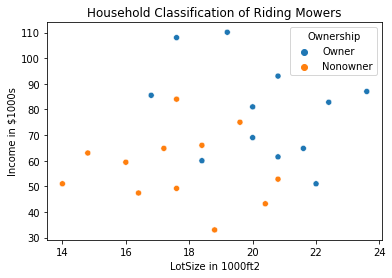

In [20]:
# scater plot of Income vs. Lot Size 

sns.scatterplot('Lot_Size', 'Income', hue='Ownership', data=riding_df).set(title = 'Household Classification of Riding Mowers', xlabel = 'LotSize in 1000ft2', ylabel = 'Income in $1000s')









From the scatterplot it appears that "owners" tend to have a higher average income.

__10.3.c.__ Among nonowners, what is the percentage of households classified correctly?

In [21]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
# change values of response variable from Owner/Nonowner to 1/0

riding_df['Ownership'].replace({'Noowner': 0, 'Owner': 1})

riding_df['Ownership'] = riding_df['Ownership'].astype('category')
# convert response variable to type categorical


y = riding_df['Ownership']
X = riding_df.drop(columns=['Ownership'])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)


logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)




LogisticRegression(C=1e+42, solver='liblinear')

In [22]:
# print coefficients

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())


intercept  -22.31518591823801
         Income  Lot_Size
coeff  0.090703  0.856325


In [23]:
# predicted y
logit_reg_pred = logit_reg.predict(train_X)
logit_reg_pred

array(['Nonowner', 'Owner', 'Owner', 'Owner', 'Nonowner', 'Owner',
       'Owner', 'Nonowner', 'Nonowner', 'Owner', 'Nonowner', 'Nonowner',
       'Nonowner', 'Nonowner', 'Owner', 'Owner', 'Owner', 'Owner',
       'Owner'], dtype=object)

In [24]:
# Confusion matrix
classificationSummary(train_y, logit_reg_pred)

Confusion Matrix (Accuracy 0.7895)

       Prediction
Actual 0 1
     0 6 2
     1 2 9


__10.3.d.__ To increase the percentage of correctly classified nonowners, should the cutoff probability be increased or decreased?

__Answer__



In [25]:
The cutoff probability should be Increased.

SyntaxError: invalid syntax (1/ipykernel_23232/3321115051.py, line 1)

__10.3.e.__ What are the odds that a household with a $60K income and a lot size of 20,000 ft<sup>2</sup> is an owner?

In [26]:
# new household

new_data=[[ 60, 20]]
df = pd.DataFrame(new_data,columns=X.columns.tolist())
df
l1 = logit_reg.predict(df)


__10.3.f.__ What is the classification of a household with a $60K income and a lot size of 20,000 ft<sup>2</sup>? Use cutoff = 0.5.

In [27]:
# logit for new household

income=60
lot_size=20
logit = -22.3+(0.09*income)+(0.85*lot_size)
logit



0.09999999999999787

Probability that the new household is 0.50 and thus the predicted class for this new household is 0, or "non-owner".

__10.3.g.__ What is the minimum income that a household with 16,000 ft2 lot size should have before it is classified as an owner?

The cutoff of 0.5 on the probability of owner is equivalent to a threshold of 0 on the logit. We therefore write the estimated logit equation, equate it to 0 and set Lot_Size=16.

0 = -25.870471875168775 + 0.110611*Income + 0.961144*Lot_Size.

We plug Lot_Size = 16 and solve for Income.

In [28]:
logit=0
lot_size=16
Income = (logit+22.3-(0.85*lot_size))/0.09
Income

96.66666666666669

The minimum income needed for this household to be classified as "owner" is XXXXXXXXX.